In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the csv catalogue
catalogT = pd.read_csv(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Louis_CorinthData\OtherEQCatalogs\BALE_2019Better_6000events_induced\Basel 2006-2018 Herrman Supplement.csv")
#catalogT = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Louis_CorinthData/OtherEQCatalogs/BALE_2019Better_6000events_induced/Basel 2006-2018 Herrman Supplement.csv')

#print(catalog)

In [3]:
# Read in the second catalogue for Basel for extended Herrmann Dataset
catalog1 = pd.read_csv(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Louis_CorinthData\OtherEQCatalogs\BALE_2019Better_6000events_induced\Basel TPID.csv")
#catalog1 = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Louis_CorinthData/OtherEQCatalogs/BALE_2019Better_6000events_induced/Basel TPID.csv')

#print(catalog1)

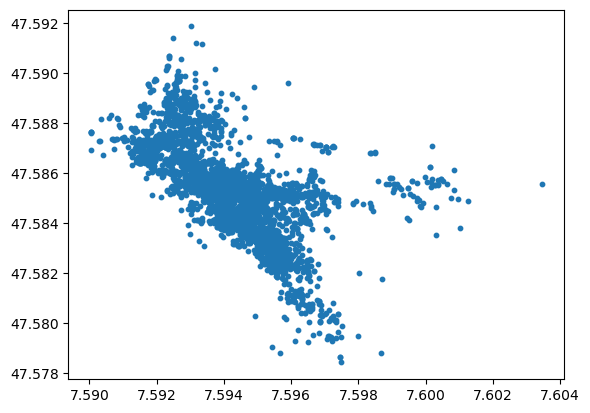

In [4]:
# convert xyz to int, lat/lon to float, and cut TPID
X=[]
Y=[]
Z=[]
lat=[]
lon=[]
dep=[]
tpid=[]
Mw=[]

for x in range(len(catalog1["SourceDateTime"])):
    if catalog1["X"][x]!="---" and catalog1["Y"][x]!="---" and catalog1["Z"][x]!="---":
        X.append(int(catalog1["X"][x]))
        Y.append(int(catalog1["Y"][x]))
        Z.append(int(catalog1["Z"][x]))
        lat.append(float(catalog1["Lat"][x]))
        lon.append(float(catalog1["Lon"][x]))
        dep.append(float(catalog1["Dep"][x]))
        if catalog1["Mwx"][x]!="-.--":
            Mw.append(float(catalog1["Mwx"][x]))
        else:
            Mw.append(-10.0)
        temp=catalog1["TpID"][x].split('p')
        if temp[0]=="------":
            tpid.append(0)
        else:
            tpid.append(int(temp[1]))
    
#print(tpid)

plt.scatter(lon,lat,s=10)
plt.show()

In [5]:
# Create a radius from well-head
R=np.sqrt(np.square(X)+np.square(Y)+np.square(Z))


In [6]:
# create tpref which is a referential array where tpref[num] gives the index of that num in the locational dataset
tpref=[0]*2509

for x in range(len(tpid)):
    tpref[tpid[x]]=x


In [7]:
len(catalogT["CCC"])
print(tpref[catalogT["TpID"][276875]])

0


In [8]:
# Assign various parms to the 280k EQ dataset
hsLat=[]
hsLon=[]
hsDep=[]
hX=[]
hY=[]
hZ=[]
hDT=[]
hsMw=[]

#len(catalog["CCC"]
for x in range(len(catalogT["CCC"])):
    if float(catalogT["CCC"][x])>=0.5:
        sDate=catalogT["Date"][x].split('-')
        sTime=catalogT["Time"][x].split(':')
        hDT.append(datetime(int(sDate[0]),int(sDate[1]),int(sDate[2]),int(sTime[0]),int(sTime[1]),int(float(sTime[2]))))
        #print(tpref[catalog["TpID"][x]],x)
        hsLat.append(lat[tpref[catalogT["TpID"][x]]])
        hsLon.append(lon[tpref[catalogT["TpID"][x]]])
        hsDep.append(dep[tpref[catalogT["TpID"][x]]])
        hX.append(X[tpref[catalogT["TpID"][x]]])
        hY.append(Y[tpref[catalogT["TpID"][x]]])
        hZ.append(Z[tpref[catalogT["TpID"][x]]])
        hsMw.append(catalogT["Mwx"][x])
        
        if catalogT["Mwx"][x]>3.0:
            magMT=hDT[-1]
            
               


In [9]:
# Inj St  grndTST? datetime(2006,12,2,17,12)
# Inj End 12.95616898148148 2006-12-08 10:32:59

injSt = datetime(2006,12,2,17,12).timestamp()/86400.0
injEnd = datetime(2006,12,8,10,32,59).timestamp()/86400.0 - injSt
print(injEnd)

dt = [x.timestamp()/86400.0 - injSt for x in hDT]

# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, hsMw, hX, hY, hZ)
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(dt))

5.722905092592555
159706 221160


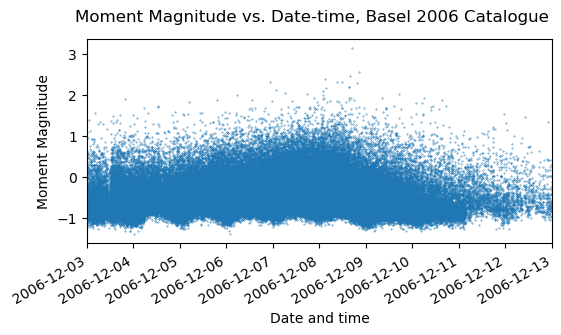

In [10]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(hDT,hsMw,s=0.1)
figure.suptitle("Moment Magnitude vs. Date-time, Basel 2006 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
ax1.set_xlim([datetime(2006,12,3),datetime(2006,12,13)])
figure.autofmt_xdate()
plt.show()

In [11]:
print(hDT[0])

2006-11-25 11:36:06


In [12]:
hR=np.sqrt(np.square(xf)+np.square(yf)+np.square(depf))

In [13]:
print(len(hsMw))
print(len(catalogT["Mwx"]))
diff=len(catalogT["Mwx"])-len(hsMw)
totalEq=len(catalogT["Mwx"])
totalNew=len(hsMw)
print(diff)

221160
280941
59781


In [14]:
# Create a referential list to sort hR

In [15]:
hRC = hR.copy()
hRref=[]
for i in range(len(hRC)):
    hRref.append(i)

In [16]:
print(len(hRC))
print(len(hRref))

159706
159706


In [17]:
# Allows for sorting two arrays based on quicksorting one (used later for reference arrays)
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        
        pivot_index = partition(arr1, arr2, low, high)

        
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]




Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [21]:
print(rDmaxRad)

[77.6659513557904, 112.21853679316978, 154.4312144613258, 209.42779185198893, 257.064194317295, 292.9163703175362, 334.8820687943742, 379.81706122816547, 429.44615494844055, 498.1867119865804, 753.6849474415686]


In [18]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [19]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)


[1, 1, 2, 3, 6, 8, 10]


In [20]:
numfig=0
def mfDisp(marr,dat,ring):
    bins = np.arange(-2, 6, 0.1)
    bv, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    histp, bp = b_value_functions.bpos(mxT)
    x = bins
    y_Mc = hist[0][np.argmax(hist[0])+2]
    a = np.log10(y_Mc) + bv*Mc
    best_fit = 10**(a-bv*x)
    mid_bins = (bins[:-1] + bins[1:])/2
    # Plot results 
    figure = plt.figure(figsize = [6,4])
    ax1 = figure.add_subplot(111)
    ax1.scatter(mid_bins, hist[0], marker = '.')
    ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(bv,2)))
    ax1.set_xlim([-2, 3])
    ax1.set_ylim([10**-1, 10**4])
    ax1.set_yscale('log')
    ax1.legend(loc = 'upper right')
    ax1.set_xlabel('Magnitude')
    ax1.set_ylabel('Count')
    ax1.set_title('MFD '+dat.isoformat()+" ring" + str(ring))
    plt.savefig("MFD "+str(ring)+" "+dat.strftime("%y%m%d%h%m")+" "+str(numfig)+".png")
    plt.close(figure)

[]

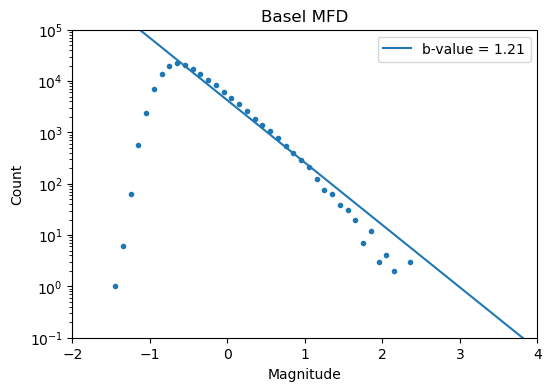

In [25]:
# Calculate b-value for the 'Mag_S' column 
bins = np.arange(-2, 6, 0.1)
MNew = np.array(magF)
b, Mc, hist = b_value_functions.btrad(np.array(MNew), bins, delta_b = 0.01)

x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 4])
ax1.set_ylim([10**-1, 10**5])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Basel MFD')
plt.plot()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ] 12089


[]

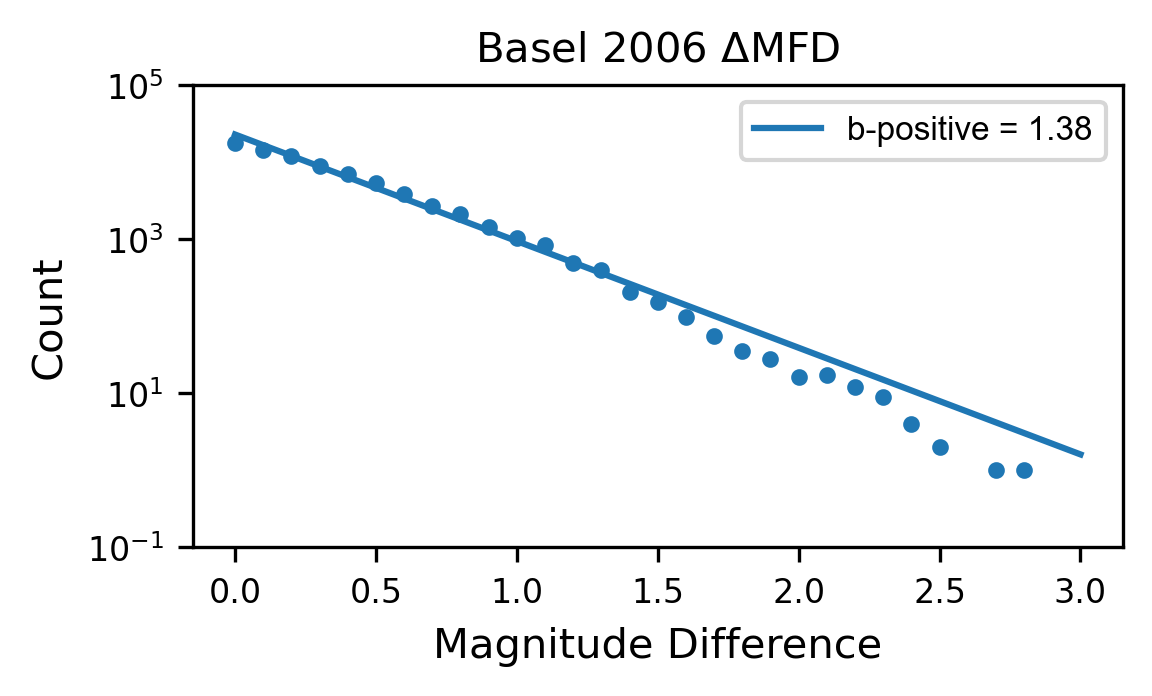

In [21]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(MNew)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**5])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Basel 2006 $\Delta$MFD',fontsize=10)
plt.plot()

#fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/Basel2006 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

In [22]:
print(Mc)

-0.49999999999999883


In [23]:
#make copy of distance array and an array referencing distance copy
hRC2 = hR.copy()
hRref2=[]
for i in range(len(hRC2)):
    hRref2.append(i)

In [24]:
print(len(hRC2))
print(len(hRref2))

159706
159706


In [25]:
# sort distance array and sort reference array along with
quicksort_with_swaps(hRC2,hRref2 , 0, len(hRC2) - 1)

In [26]:
# create 2d array to arrange shells of references based on distance
rDivs2=[[] for i in range(2)]
rDmaxRad2=[]
count=0
rpl=0
for i in range(len(hRC2)):
    if count <79853:
        rDivs2[rpl].append(hRref2[i])
        count +=1
    if count ==79853:
        count = 0
        rpl+=1
        rDmaxRad2.append(hRC2[i])

In [27]:
# sort the reference array of each shell, making it so each shell is now ordered by date
sDivs2=[[] for i in range(2)]
for i in range(2):
    sDivs2[i]=quicksort(rDivs2[i])

In [28]:
print(rDmaxRad2)

[np.float64(229.16151509361254), np.float64(961.2148563146535)]


In [31]:
br2=[[] for i in range(2)]
bpr2=[[] for i in range(2)]
dtr2=[[] for i in range(2)]
lbr2=[[] for i in range(2)]
hbr2=[[] for i in range(2)]
stdr2=[[] for i in range(2)]
lbpr2=[[] for i in range(2)]
hbpr2=[[] for i in range(2)]
stdpr2=[[] for i in range(2)]
mxmr2=[[] for i in range(2)]
mxdr2=[[] for i in range(2)]

for i in range(2):
    print(i)
    t1 = True
    t2 = True
    t3 = True
    for x in range(1000,len(sDivs2[i]),100):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-1000,x):
            mxt.append(MNew[sDivs2[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs2[i][j]]
        mxT=np.array(mxt)
        mxmr2[i].append(mxm)
        mxdr2[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
        br2[i].append(b)
        dtr2[i].append(dtF[sDivs2[i][x]])
        bpr2[i].append(bP)
        lbr2[i].append(low_b)
        lbpr2[i].append(low_bp)
        hbr2[i].append(high_b)
        hbpr2[i].append(high_bp)
        stdr2[i].append(std)
        stdpr2[i].append(stdp)
        
        if(t1==True  and hDT[sDivs2[i][x]]>=datetime(2006,12,7)):
            mfDisp(mxT,hDT[sDivs2[i][x]],i)
            t1=False
            
        if(t2==True  and hDT[sDivs2[i][x]]>=datetime(2006,12,8)):
            mfDisp(mxT,hDT[sDivs2[i][x]],i)
            t2=False
            
        if(t3==True  and hDT[sDivs2[i][x]]>=datetime(2006,12,9,12)):
            mfDisp(mxT,hDT[sDivs2[i][x]],i)
            t3=False

0
1


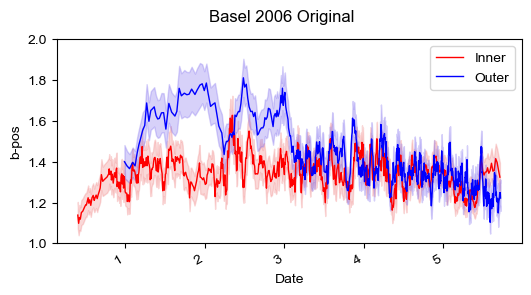

In [32]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("Basel 2006 Original")
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([datetime(2006,12,3),datetime(2006,12,13)])
ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
ax1.legend(loc = 'upper right')
plt.show()

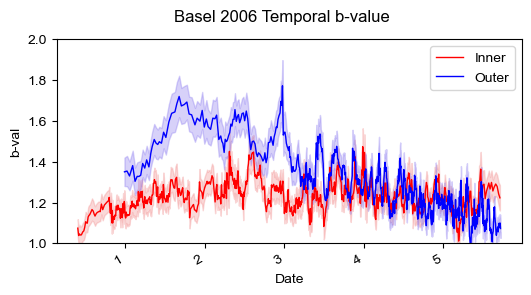

In [33]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("Basel 2006 Temporal b-value")
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([datetime(2006,12,3),datetime(2006,12,13)])
ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-val')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
ax1.legend(loc = 'upper right')
plt.show()

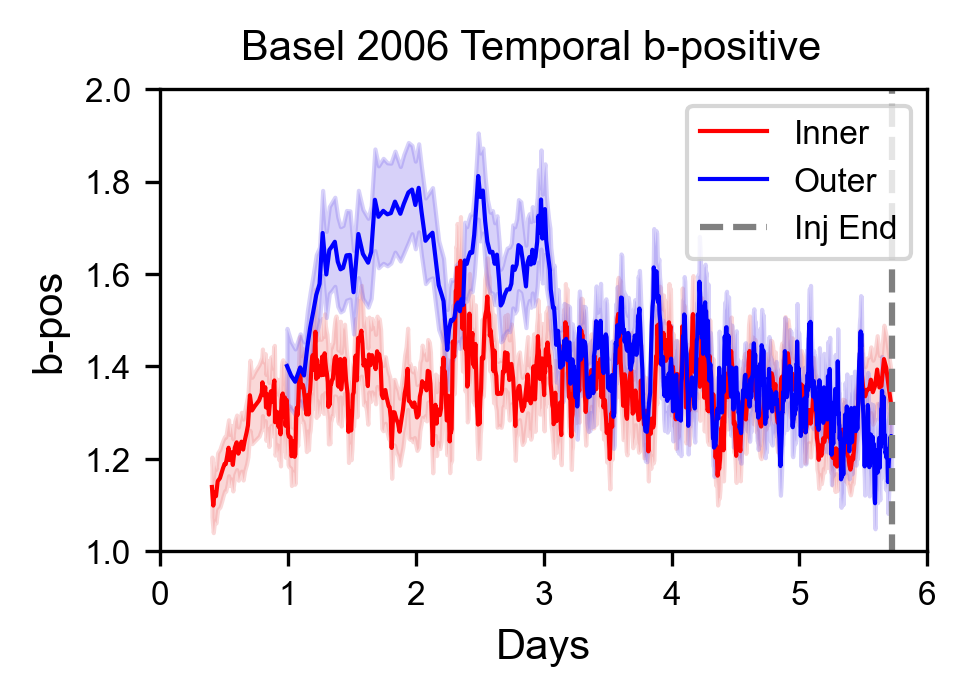

In [34]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Basel 2006 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')

ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([0,6])
ax1.set_ylim([1,2])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/Supplementary bv vs bp figs/Basel b-pos.png',bbox_inches='tight', pad_inches=0.05)

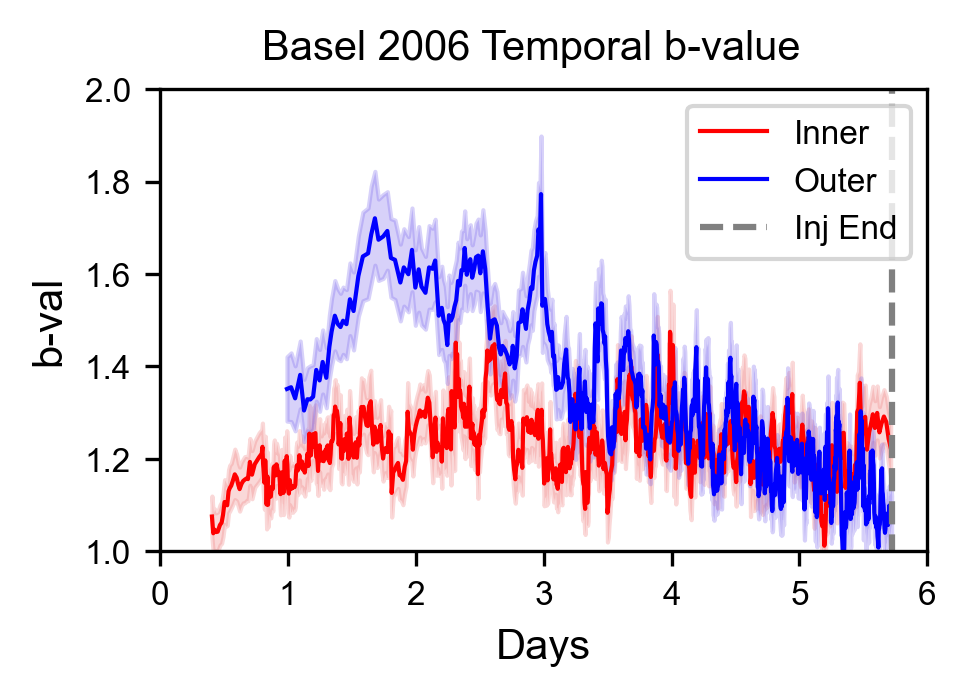

In [35]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Basel 2006 Temporal b-value",fontsize=10)
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')

ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([0,6])
ax1.set_ylim([1,2])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-val',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\basel2006.png",bbox_inches='tight', pad_inches=0.05)
#fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/Supplementary bv vs bp figs/Basel b-val.png',bbox_inches='tight', pad_inches=0.05)


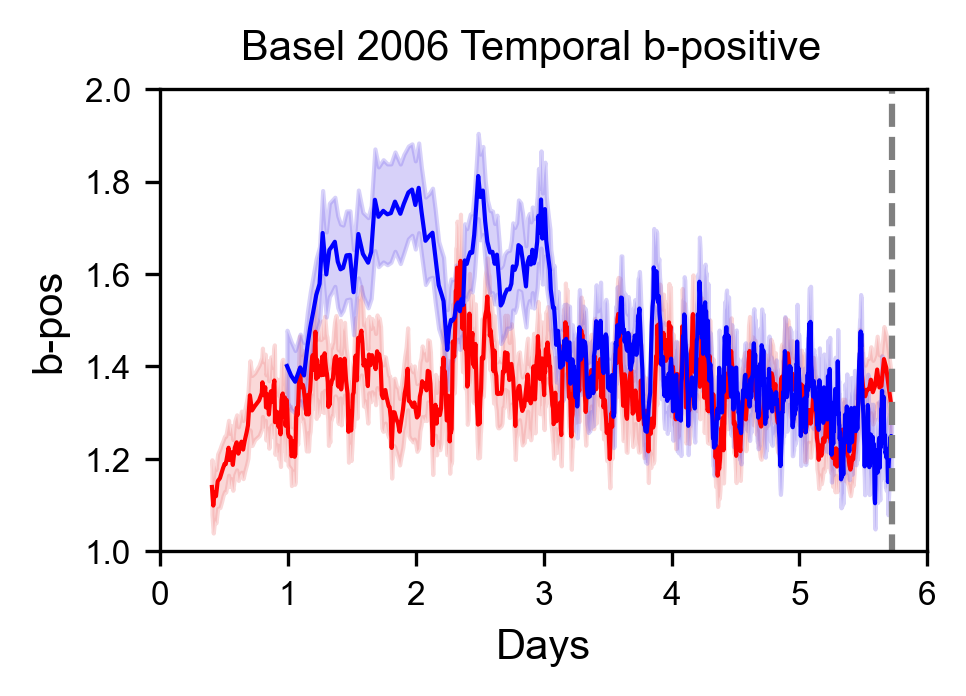

In [37]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Basel 2006 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')

ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([0,6])
ax1.set_ylim([1,2])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

#plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\basel2006 sansLgnd.png",bbox_inches='tight', pad_inches=0.05)

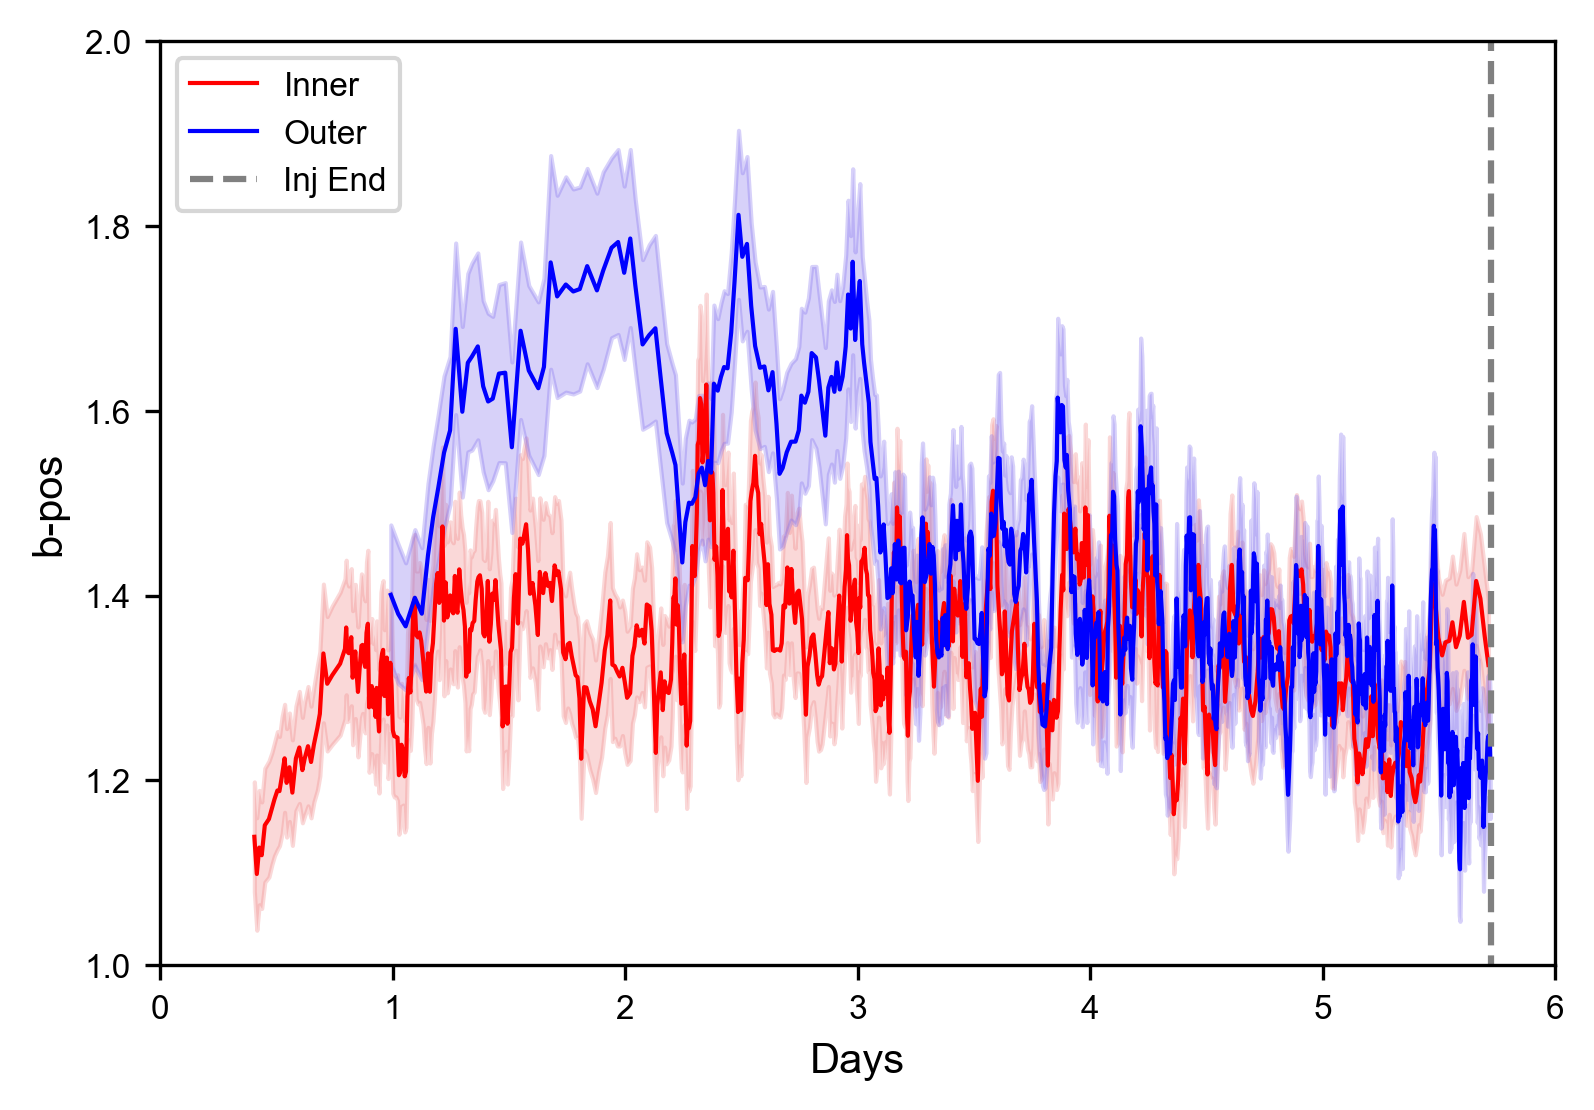

In [38]:
fig, ax1 = plt.subplots(figsize=(6,4),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#fig.suptitle("Basel 2006 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')

ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([0,6])
ax1.set_ylim([1,2])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper left',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel io fig.png",bbox_inches='tight', pad_inches=0.05)

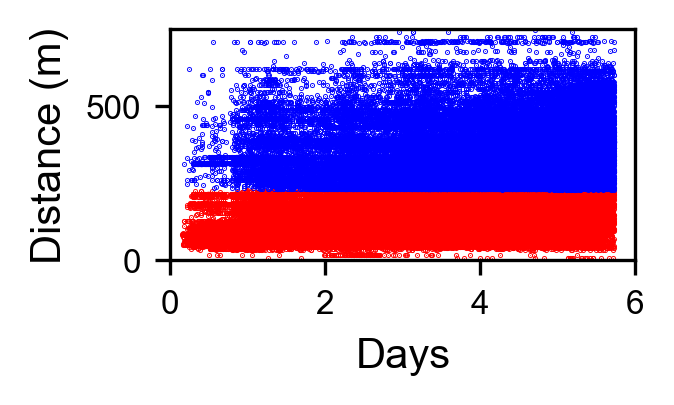

In [39]:
#stDat= datetime(2006,11,25,11,36,6)
radShell=[[] for i in range(2)]
radDat =[[] for i in range(2)]
for i in range(2):
    for x in range(len(sDivs2[i])):
        radShell[i].append(hR[sDivs2[i][x]])
        radDat[i].append(dtF[sDivs2[i][x]])
            

fig, ax1 = plt.subplots(figsize=(2,1),dpi=300)

plt.scatter(radDat[0],radShell[0],c='r',s=0.05, label='Inner')
plt.scatter(radDat[1],radShell[1],c='b',s=0.05,label='Outer')
#plt.title("Schematic Seismicity Fronts Based Off SSFS 1993",size=15)
plt.xlabel("Days",fontsize=10)
plt.ylabel("Distance (m)",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,6)
plt.ylim(0,750)
#plt.legend(fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front fig.png",bbox_inches='tight', pad_inches=0.05)
#fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel io inset.png",bbox_inches='tight', pad_inches=0.05)

In [38]:
# find max eq in both inner and outer shells
ioMax =[-10,-10]
for i in range(len(sDivs2[0])):
    if MNew[sDivs2[0][i]]>ioMax[0]:
        ioMax[0]=MNew[sDivs2[0][i]]
for i in range(len(sDivs2[1])):
    if MNew[sDivs2[1][i]]>ioMax[1]:
        ioMax[1]=MNew[sDivs2[1][i]]

print(ioMax)

[np.float64(2.32), np.float64(2.4)]


In [39]:
print(rDmaxRad2[0]/rDmaxRad2[1])
print(rDmaxRad2[0],rDmaxRad2[1])

0.23840821184581915
229.16151509361254 961.2148563146535


In [40]:
print(Mc)

-0.49999999999999883


In [59]:
# Recalculate all the relevant Basel graphs with the original Basel dataset (not the Matched Template one)

In [50]:
print(catalogT)

            ID        Date      Time   Mwx   MLx  TpID       CCC
0            1  2006-11-25  11:36:06 -0.81 -2.40    22  0.628495
1            2  2006-11-25  17:58:52 -0.60 -2.10    32  0.792158
2            3  2006-11-25  19:08:01 -0.96 -2.64    34  0.418740
3            4  2006-11-25  19:49:24 -0.49 -1.97     3  0.655571
4            5  2006-11-25  20:19:40 -0.72 -2.27    34  0.720914
...        ...         ...       ...   ...   ...   ...       ...
280936  280937  2018-08-16   2:53:51 -0.22 -1.47  2500  0.616560
280937  280938  2018-08-16   6:03:03  0.78 -0.03   499  0.652030
280938  280939  2018-08-16   6:03:08  0.10 -0.98  1403  0.524917
280939  280940  2018-08-19  21:33:41  0.13 -0.98  1675  0.486613
280940  280941  2018-08-21   9:56:41 -0.83 -2.46  2209  0.458343

[280941 rows x 7 columns]


In [51]:
print(catalog1)

               SourceDateTime  LSrc       Lat      Lon   Dep    X     Y     Z  \
0     2006-11-25T21:16:45.287   GEL  47.58598  7.59394  4393   21   -12    39   
1     2006-11-25T22:44:21.122   GEL  47.58586  7.59409  4326   32   -25   -28   
2     2006-11-25T22:45:02.863   GEL  47.58612  7.59425  4293   44     3   -61   
3     2006-11-26T00:29:51.061   GEL  47.58595   7.5933  4289  -27   -16   -65   
4     2006-12-02T22:05:17.608  KD14  47.58561  7.59355  4289   -8   -54   -65   
...                       ...   ...       ...      ...   ...  ...   ...   ...   
3718  2017-03-25T03:14:09.139   ---  --.-----  -.-----  ----  ---   ---   ---   
3719  2017-03-26T04:51:08.467   ---  --.-----  -.-----  ----  ---   ---   ---   
3720  2017-04-13T04:48:30.930   ---  --.-----  -.-----  ----  ---   ---   ---   
3721  2017-12-26T10:29:59.490   SED  47.58077  7.59725  3659  271  -591  -695   
3722  2018-08-02T03:38:02.831   ---  --.-----  -.-----  ----  ---   ---   ---   

       Mwx MwGEL MwSED MLSE

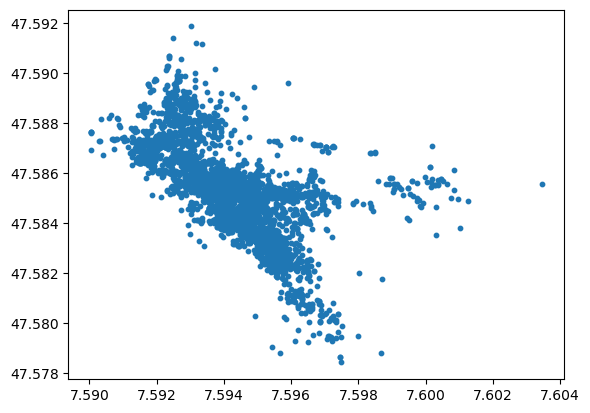

In [61]:
# convert xyz to int, lat/lon to float, and cut TPID
X1=[]
Y1=[]
Z1=[]
lat1=[]
lon1=[]
dep1=[]
tpid1=[]
Mw1=[]
dateT=[]
#  2006-11-25T21:16:45.287
for x in range(len(catalog1["SourceDateTime"])):
    if catalog1["X"][x]!="---" and catalog1["Y"][x]!="---" and catalog1["Z"][x]!="---":
        X1.append(int(catalog1["X"][x]))
        Y1.append(int(catalog1["Y"][x]))
        Z1.append(int(catalog1["Z"][x]))
        lat1.append(float(catalog1["Lat"][x]))
        lon1.append(float(catalog1["Lon"][x]))
        dep1.append(float(catalog1["Dep"][x]))
        dateT.append(datetime.strptime(catalog1["SourceDateTime"][x],"%Y-%m-%dT%H:%M:%S.%f"))
        if catalog1["Mwx"][x]!="-.--":
            Mw1.append(float(catalog1["Mwx"][x]))
        else:
            Mw1.append(-10.0)
        temp=catalog1["TpID"][x].split('p')
        if temp[0]=="------":
            tpid1.append(0)
        else:
            tpid1.append(int(temp[1]))
    
#print(tpid)

plt.scatter(lon,lat,s=10)
plt.show()

In [53]:
print(len(lon))

3690


In [62]:
booT = True
z=0
while(booT):
    if(Mw1[z]==-10):
        Mw1.pop(z)
        X1.pop(z)
        Y1.pop(z)
        Z1.pop(z)
        lat1.pop(z)
        lon1.pop(z)
        dep1.pop(z)
        dateT.pop(z)
    else:
        z=z+1
    
    if(z==len(Mw1)-1):
        booT=False
            

In [75]:
dtest = True
for i in range(len(Mw1)):
    if(dtest):
        if(dateT[i]>datetime(2006,12,14)):
            dtree = i
            dtest=False
print(dtree,dateT[dtree])

3177 2006-12-14 01:21:07.637000


In [76]:
Mw1=Mw1[:dtree]
X1=X1[:dtree]
Y1=Y1[:dtree]
Z1=Z1[:dtree]
lat1=lat1[:dtree]
lon1=lon1[:dtree]
dep1=dep1[:dtree]
dateT=dateT[:dtree]

In [77]:
print(len(Mw1))

3177


In [78]:
R1=np.sqrt(np.square(X1)+np.square(Y1)+np.square(Z1))

In [79]:
R1C = R1.copy()
R1ref=[]
for i in range(len(R1C)):
    R1ref.append(i)

In [80]:
quicksort_with_swaps(R1C,R1ref , 0, len(R1C) - 1)

In [81]:
# create 2d array to arrange shells of references based on distance
rDivs3=[[] for i in range(2)]
rDmaxRad3=[]
count=0
rpl=0
for i in range(len(R1C)):
    if count <1589:
        rDivs3[rpl].append(R1ref[i])
        count +=1
    if count ==1589:
        count = 0
        rpl+=1
        rDmaxRad3.append(R1C[i])

In [82]:
# sort the reference array of each shell, making it so each shell is now ordered by date
sDivs3=[[] for i in range(2)]
for i in range(2):
    sDivs3[i]=quicksort(rDivs3[i])

In [83]:
rDmaxRad3.append(R1C[len(R1C)-1])
print(rDmaxRad3)

[279.9624974885029, 711.6642466781649]


In [84]:
br3=[[] for i in range(2)]
bpr3=[[] for i in range(2)]
dtr3=[[] for i in range(2)]
lbr3=[[] for i in range(2)]
hbr3=[[] for i in range(2)]
stdr3=[[] for i in range(2)]
lbpr3=[[] for i in range(2)]
hbpr3=[[] for i in range(2)]
stdpr3=[[] for i in range(2)]
mxmr3=[[] for i in range(2)]
mxdr3=[[] for i in range(2)]

for i in range(2):
    print(i)
    
    for x in range(300,len(sDivs3[i]),30):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(Mw1[sDivs3[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dateT[sDivs3[i][j]]
        mxT=np.array(mxt)
        mxmr3[i].append(mxm)
        mxdr3[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
        br3[i].append(b)
        dtr3[i].append(dateT[sDivs3[i][x]])
        bpr3[i].append(bP)
        lbr3[i].append(low_b)
        lbpr3[i].append(low_bp)
        hbr3[i].append(high_b)
        hbpr3[i].append(high_bp)
        stdr3[i].append(std)
        stdpr3[i].append(stdp)


0
1


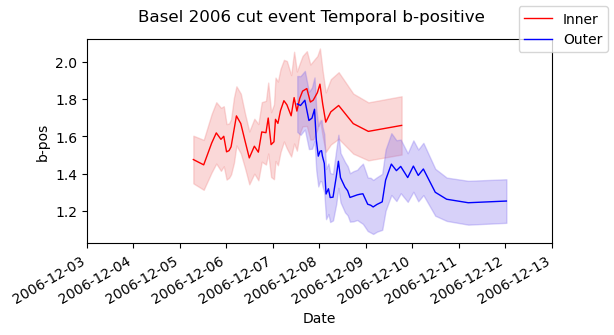

In [101]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("Basel 2006 cut event Temporal b-positive")
ax1.plot(dtr3[0],bpr3[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr3[0], np.subtract(bpr3[0],stdpr3[0]), np.add(bpr3[0],stdpr3[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr3[1],bpr3[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr3[1], np.subtract(bpr3[1],stdpr3[1]), np.add(bpr3[1],stdpr3[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.set_xlim([datetime(2006,12,3),datetime(2006,12,13)])
#ax1.set_xlim([,12])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

[]

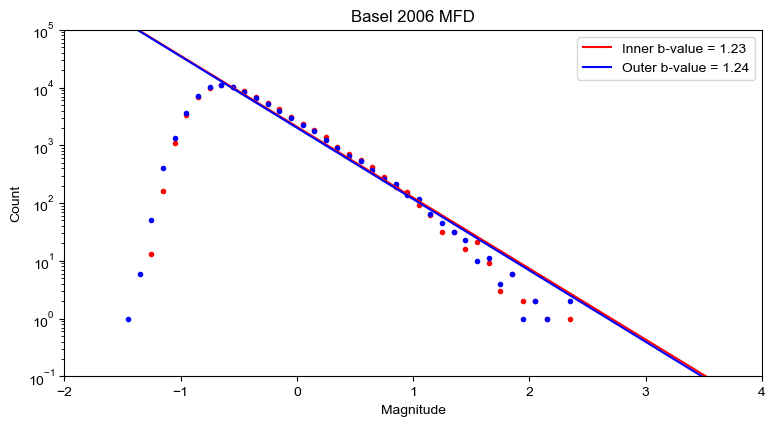

In [41]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MNew[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MNew[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.00001)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.00001)

x = bins
y_Mci = histi[0][np.argmax(histi[0])+2]
ai = np.log10(y_Mci) + bi*Mci

best_fiti = 10**(ai-bi*x)

x = bins
y_Mco = histo[0][np.argmax(histo[0])+2]
ao = np.log10(y_Mco) + bo*Mco
best_fito = 10**(ao-bo*x)

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [9,4.5])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, histi[0], marker = '.',color='r')
ax1.plot(x, best_fiti, label = 'Inner b-value = '+str(np.round(bi,2)),color='r')

ax1.scatter(mid_bins, histo[0], marker = '.',color='b')
ax1.plot(x, best_fito, label = 'Outer b-value = '+str(np.round(bo,2)),color='b')

ax1.set_xlim([-2, 4])
ax1.set_ylim([10**-1, 10**5])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Basel 2006 MFD')
plt.plot()

1.341148292015001 1.3697436334213546


[]

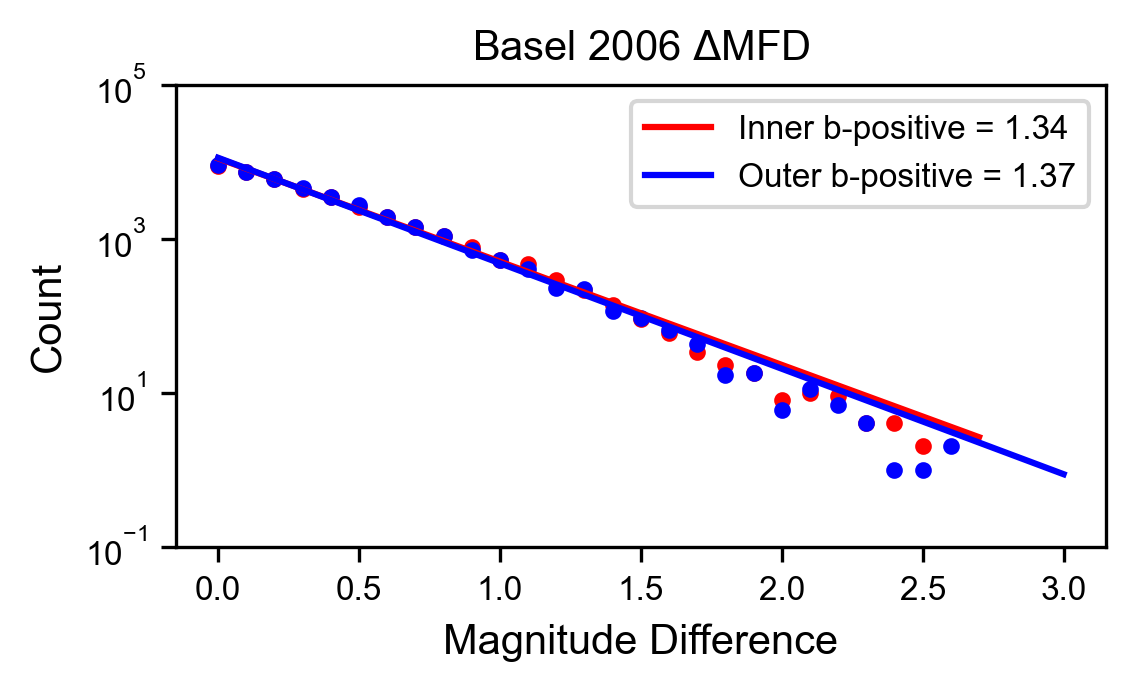

In [36]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MNew[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MNew[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)



#x = hist1[1] yint = hist1[0][2] print(x,yint) best_fit = 10**(np.log10(yint)-bP*(x-0.2)) 

xi = histi1[1]
y_Mci = histi1[0][2]
best_fiti = 10**(np.log10(y_Mci)-bPi*(xi-0.2))

xo = histo1[1]
y_Mco = histo1[0][2]
best_fito = 10**(np.log10(y_Mco)-bPo*(xo-0.2))

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 


# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'

ax1.scatter(np.copy(histi1[1])[:-1], histi1[0], marker = '.',color='r')
ax1.plot(xi, best_fiti, label = 'Inner b-positive = '+str(np.round(bPi,2)),color='r')

ax1.scatter(np.copy(histo1[1])[:-1], histo1[0], marker = '.',color='b')
ax1.plot(xo, best_fito, label = 'Outer b-positive = '+str(np.round(bPo,2)),color='b')

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**5])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Basel 2006 $\Delta$MFD',fontsize=10)
plt.plot()
#fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/Basel2006 IO DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

[]

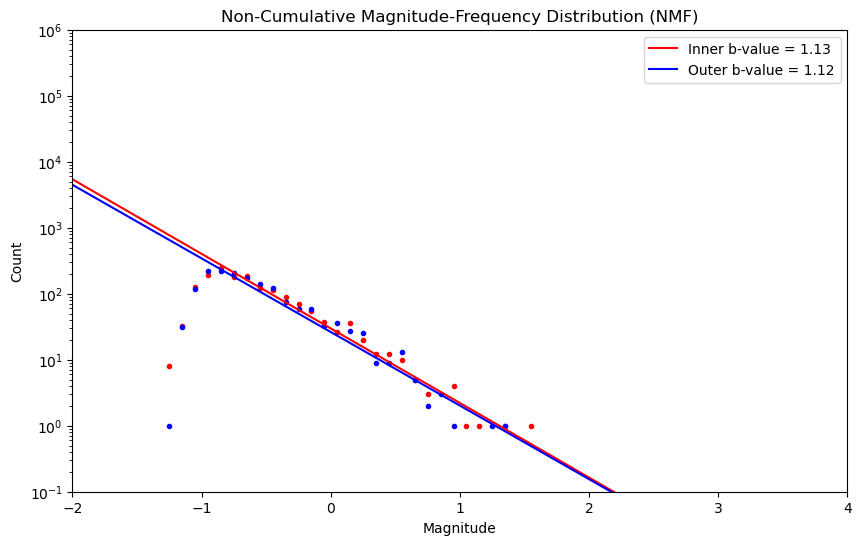

In [99]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner1=[]
outer1=[]

for i in range(len(sDivs3[0])):
    inner1.append(hsMw[sDivs3[0][i]])
for i in range(len(sDivs3[1])):
    outer1.append(hsMw[sDivs3[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi1, Mci1, histi1 = b_value_functions.btrad(np.array(inner1), bins, delta_b = 0.00001)
bo1, Mco1, histo1 = b_value_functions.btrad(np.array(outer1), bins, delta_b = 0.00001)
histi2, bPi1 = b_value_functions.bpos(inner1)
histo2, bPo1 = b_value_functions.bpos(outer1)

x = bins
y_Mci1 = histi1[0][np.argmax(histi1[0])+2]
ai1 = np.log10(y_Mci1) + bi1*Mci1

best_fiti1 = 10**(ai1-bi1*x)

x = bins
y_Mco1 = histo1[0][np.argmax(histo1[0])+2]
ao1= np.log10(y_Mco1) + bo1*Mco1
best_fito1 = 10**(ao1-bo1*x)

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [10,6])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, histi1[0], marker = '.',color='r')
ax1.plot(x, best_fiti1, label = 'Inner b-value = '+str(np.round(bi1,2)),color='r')

ax1.scatter(mid_bins, histo1[0], marker = '.',color='b')
ax1.plot(x, best_fito1, label = 'Outer b-value = '+str(np.round(bo1,2)),color='b')

ax1.set_xlim([-2, 4])
ax1.set_ylim([10**-1, 10**6])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Non-Cumulative Magnitude-Frequency Distribution (NMF)')
plt.plot()

In [100]:
print(bPi1,bPo1)

1.1672941296085453 1.2222778322509265


In [105]:
mmdi=[]
mmmi=[]
for x in range(len(sDivs2[0])):
    mmdi.append(hDT[sDivs2[0][x]])
    mmmi.append(hsMw[sDivs2[0][x]])
    
mmdo=[]
mmmo=[]
for x in range(len(sDivs2[1])):
    mmdo.append(hDT[sDivs2[1][x]])
    mmmo.append(hsMw[sDivs2[1][x]])

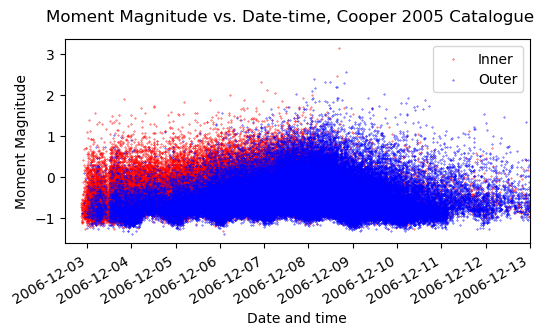

In [109]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(mmdi,mmmi,s=0.1,color='r',label='Inner')
ax1.scatter(mmdo,mmmo,s=0.1,color='b',label='Outer')
figure.suptitle("Moment Magnitude vs. Date-time, Cooper 2005 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
ax1.set_xlim([datetime(2006,12,2,12),datetime(2006,12,13)])
ax1.legend(loc = 'upper right')
figure.autofmt_xdate()
plt.show()

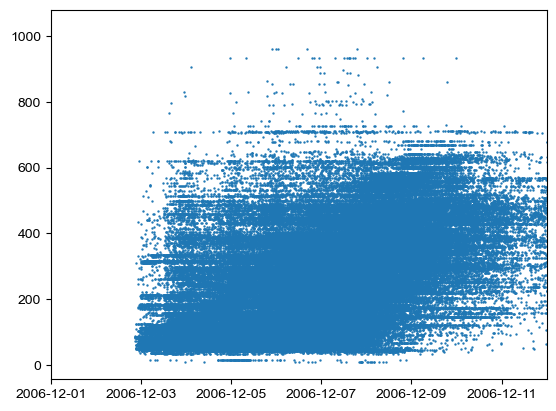

In [55]:
plt.scatter(hDT,hR,s=0.5)
plt.xlim(datetime(2006,12,1),datetime(2006,12,12))
plt.show()

In [51]:
# Spatial for Basel and Temporal for Basel, as proof that the pore pressure driven model is not the whole picture....

In [22]:
# Temporal 

brT=[]
bprT=[]
dtrT=[]
lbrT=[]
hbrT=[]
stdrT=[]
lbprT=[]
hbprT=[]
stdprT=[]
mxmrT=[]
mxdrT=[]


for x in range(1000,len(MNew),100):
    if x%1000==0:
        print(x)
    mxt =[]
    mxm=-10
    md=0
    for j in range(x-1000,x):
        mxt.append(MNew[j])    
    mxT=np.array(mxt)
    
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    brT.append(b)
    dtrT.append(dtF[x])
    bprT.append(bP)
    lbrT.append(low_b)
    lbprT.append(low_bp)
    hbrT.append(high_b)
    hbprT.append(high_bp)
    stdrT.append(std)
    stdprT.append(stdp)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [23]:
# Spatial

#make copy of distance array and an array referencing distance copy
hRS = hR.copy()
hRrefS=[]
for i in range(len(hRS)):
    hRrefS.append(i)
    
# sort distance array and sort reference array along with
quicksort_with_swaps(hRS,hRrefS , 0, len(hRS) - 1)

# create 2d array to arrange shells of references based on distance
rDS=[[] for i in range(11)]
rDmaxS=[]
count=0
rpl=0
print(int(len(MNew)/10))
for i in range(len(hRS)):
    if count <int(len(MNew)/11.0)+1:
        rDS[rpl].append(hRrefS[i])
        count +=1
    if count ==int(len(MNew)/11.0)+1:
        count = 0
        rpl+=1
        
        rDmaxS.append(hRS[i])

# sort the reference array of each shell, making it so each shell is now ordered by date
sDivsS=[[] for i in range(11)]
for i in range(11):
    sDivsS[i]=quicksort(rDS[i])
print(rpl)
brS=[]
bprS=[]
dtrS=[]
lbrS=[]
hbrS=[]
stdrS=[]
lbprS=[]
hbprS=[]
stdprS=[]
mxmrS=[]
mxdrS=[]

for i in range(11):
    mxt=[]
    for x in range(len(sDivsS[i])):
        mxt.append(MNew[sDivsS[i][x]])
    mxT=np.array(mxt)
    #print(mxT)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    brS.append(b)
    dtrS.append(dtF[sDivsS[i][x]])
    bprS.append(bP)
    lbrS.append(low_b)
    lbprS.append(low_bp)
    hbrS.append(high_b)
    hbprS.append(high_bp)
    stdrS.append(std)
    stdprS.append(stdp)
    

15970
10


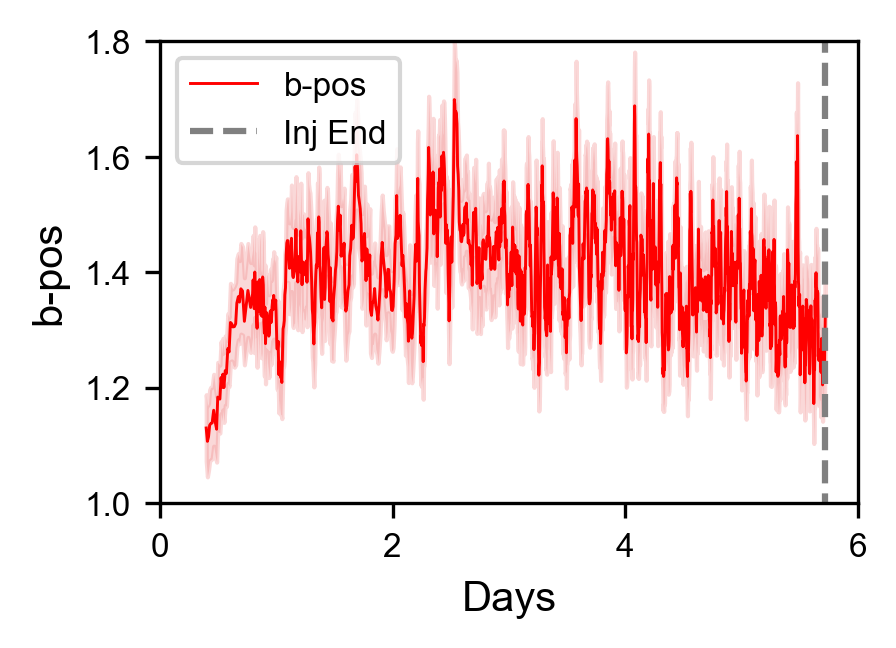

In [78]:
fig, ax1 = plt.subplots(figsize=(3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.plot(dtrT,bprT,color="red",linewidth=0.7,label='b-pos')
ax1.fill_between(dtrT, np.subtract(bprT,stdprT), np.add(bprT,stdprT), alpha = 0.3, color = 'lightcoral')

ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([0,6])
ax1.set_ylim([1,1.8])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel sf fig.png",bbox_inches='tight', pad_inches=0.05)

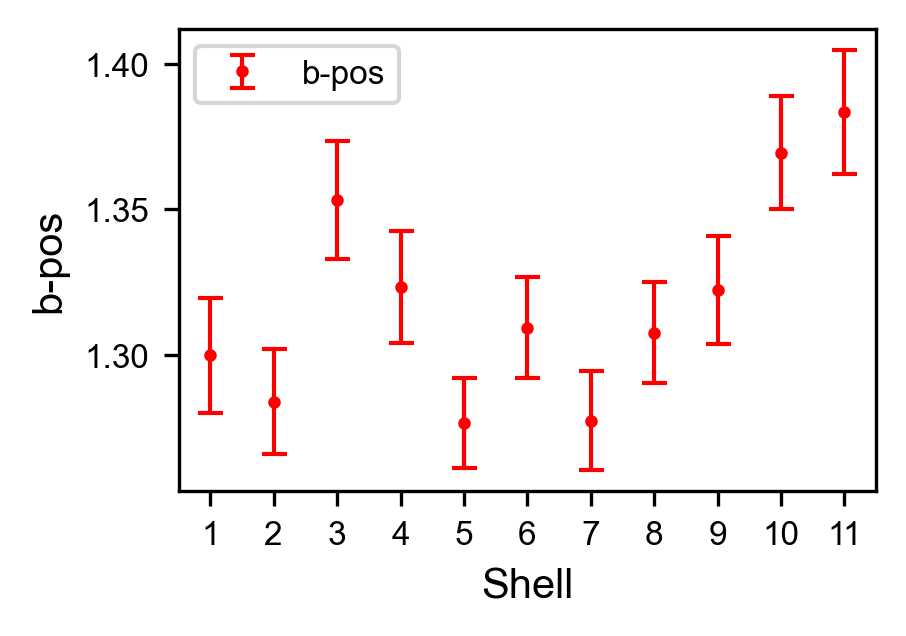

In [25]:
fig, ax1 = plt.subplots(figsize=(3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
xax = [i for i in range(1,12)]
#fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.errorbar(xax,bprS,yerr=stdprS,fmt='o', ms=2, capsize=3,elinewidth=1,ecolor='red',color="red",linewidth=0.7,label='b-pos')

ax1.set_xticks(np.linspace(1, 11, 11))
#ax1.set_ylim([1,2])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Shell',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel sf fig.png",bbox_inches='tight', pad_inches=0.05)

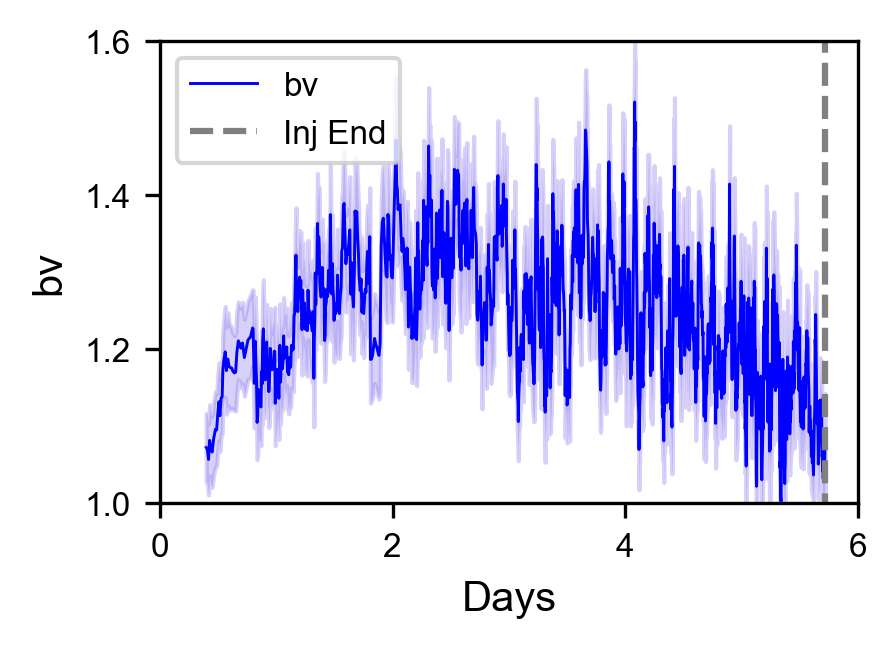

In [77]:
fig, ax1 = plt.subplots(figsize=(3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.plot(dtrT,brT,color="blue",linewidth=0.7,label='bv')
ax1.fill_between(dtrT, np.subtract(brT,stdrT), np.add(brT,stdrT), alpha = 0.3, color = 'mediumslateblue')

ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([0,6])
ax1.set_ylim([1,1.6])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('bv',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel sf fig.png",bbox_inches='tight', pad_inches=0.05)

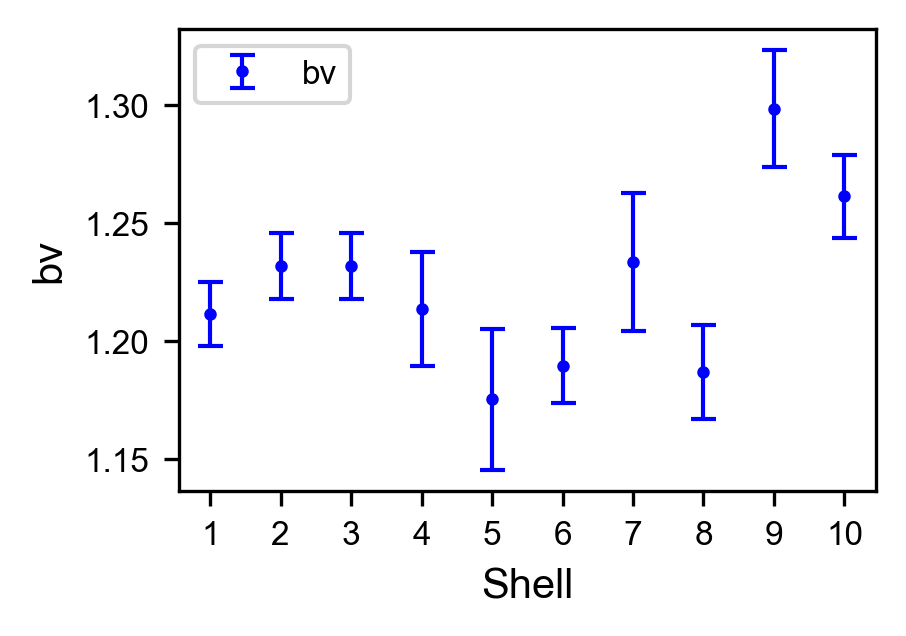

In [79]:
fig, ax1 = plt.subplots(figsize=(3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
xax = [i for i in range(1,11)]
#fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.errorbar(xax,brS,yerr=stdrS,fmt='o', ms=2, capsize=3,elinewidth=1,ecolor='blue',color="blue",linewidth=0.7,label='bv')

ax1.set_xticks(np.linspace(1, 10, 10))
#ax1.set_ylim([1,2])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('bv',fontsize=10)
ax1.set_xlabel('Shell',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel sf fig.png",bbox_inches='tight', pad_inches=0.05)

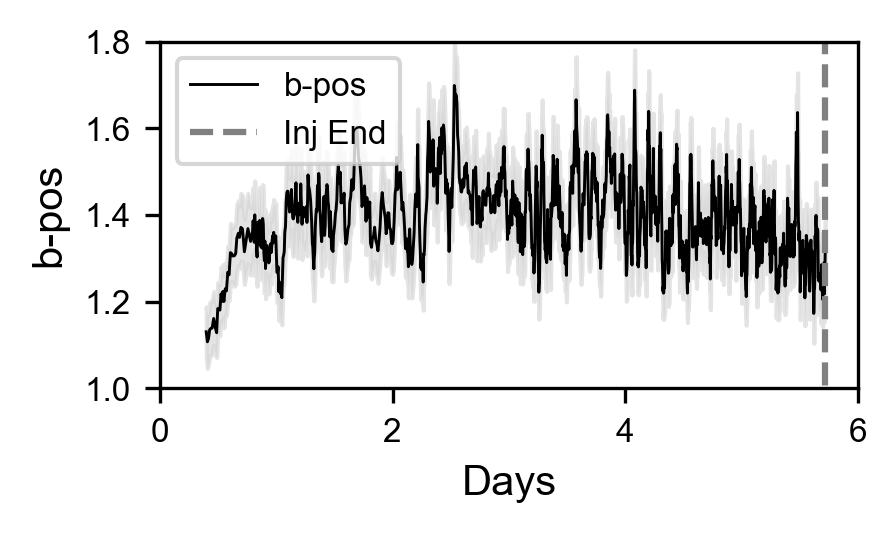

In [91]:
fig, ax1 = plt.subplots(figsize=(3,1.5),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.plot(dtrT,bprT,color="k",linewidth=0.7,label='b-pos')
ax1.fill_between(dtrT, np.subtract(bprT,stdprT), np.add(bprT,stdprT), alpha = 0.6, color = 'lightgray')

ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([0,6])
ax1.set_ylim([1,1.8])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8)
plt.show()
fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel time fig1.png",bbox_inches='tight', pad_inches=0.05)

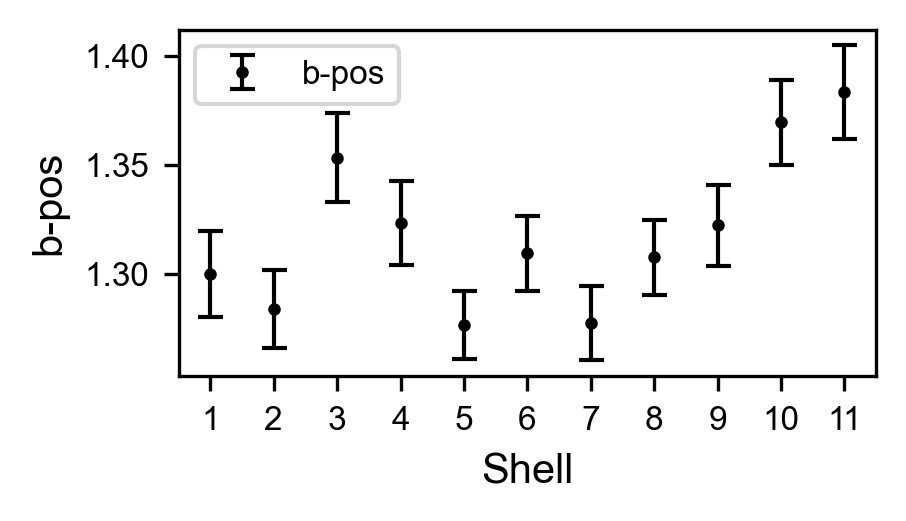

In [27]:
fig, ax1 = plt.subplots(figsize=(3,1.5),dpi=300)
plt.rcParams['font.family'] = 'Arial'
xax = [i for i in range(1,12)]
#fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.errorbar(xax,bprS,yerr=stdprS,fmt='o', ms=2, capsize=3,elinewidth=1,ecolor='k',color="k",linewidth=0.7,label='b-pos')

ax1.set_xticks(np.linspace(1, 11, 11))
#ax1.set_ylim([1,2])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Shell',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8)
plt.show()
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\Basel Figures\basel space fig1-new v2.png",bbox_inches='tight', pad_inches=0.05)

In [51]:
#### Manual Mc calculation

In [87]:
hrCut=[]
hrRefCut=[]
MNewCut=[]
for i in range(len(hR)):
   if MNew[i]>=-0.2:
       hrRefCut.append(i)
       hrCut.append(hR[i])


In [88]:
print(int(len(hrCut)/2))

16503


In [89]:
#make copy of distance array and an array referencing distance copy

hist_bins = bins
hRC3 = hrCut.copy()
hRref3=np.copy(hrRefCut)


quicksort_with_swaps(hRC3,hRref3 , 0, len(hRC3) - 1)

rDivs3=[[] for i in range(2)]
rDmaxRad3=[]
count=0
rpl=0
for i in range(len(hRC3)):
    if count <int(len(hrCut)/2)+1:
        rDivs3[rpl].append(hRref3[i])
        count +=1
    if count ==int(len(hrCut)/2)+1:
        count = 0
        rpl+=1
        rDmaxRad3.append(hRC3[i])
print(rDmaxRad3)
sDivs3=[[] for i in range(2)]
for i in range(2):
    sDivs3[i]=quicksort(rDivs3[i])

br3=[[] for i in range(2)]
bpr3=[[] for i in range(2)]
dtr3=[[] for i in range(2)]
lbr3=[[] for i in range(2)]
hbr3=[[] for i in range(2)]
stdr3=[[] for i in range(2)]
lbpr3=[[] for i in range(2)]
hbpr3=[[] for i in range(2)]
stdpr3=[[] for i in range(2)]
mxmr3=[[] for i in range(2)]
mxdr3=[[] for i in range(2)]

for i in range(2):
    print(i)
    t1 = True
    t2 = True
    t3 = True
    for x in range(1000,len(sDivs3[i]),100):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-1000,x):
            mxt.append(MNew[sDivs3[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs3[i][j]]
        mxT=np.array(mxt)
        mxmr3[i].append(mxm)
        mxdr3[i].append(md)
        b,Mc, hist = b_value_functions.btrad(mxT, bins,delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
        br3[i].append(b)
        dtr3[i].append(dtF[sDivs3[i][x]])
        bpr3[i].append(bP)
        lbr3[i].append(low_b)
        lbpr3[i].append(low_bp)
        hbr3[i].append(high_b)
        hbpr3[i].append(high_bp)
        stdr3[i].append(std)
        stdpr3[i].append(stdp)
        
        if(t1==True  and hDT[sDivs2[i][x]]>=datetime(2006,12,7)):
            mfDisp(mxT,hDT[sDivs2[i][x]],i)
            t1=False
            
        if(t2==True  and hDT[sDivs2[i][x]]>=datetime(2006,12,8)):
            mfDisp(mxT,hDT[sDivs2[i][x]],i)
            t2=False
            
        if(t3==True  and hDT[sDivs2[i][x]]>=datetime(2006,12,9,12)):
            mfDisp(mxT,hDT[sDivs2[i][x]],i)
            t3=False

[np.float64(221.07690969434145)]
0
1


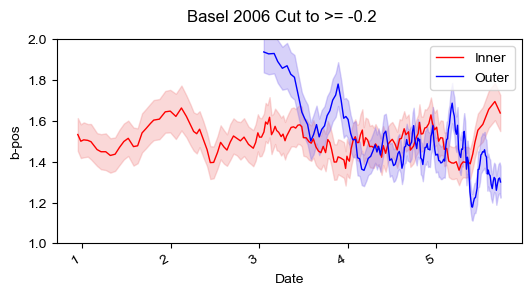

In [90]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("Basel 2006 Cut to >= -0.2")
ax1.plot(dtr3[0],bpr3[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr3[0], np.subtract(bpr3[0],stdpr3[0]), np.add(bpr3[0],stdpr3[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr3[1],bpr3[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr3[1], np.subtract(bpr3[1],stdpr3[1]), np.add(bpr3[1],stdpr3[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([datetime(2006,12,3),datetime(2006,12,13)])
ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
ax1.legend(loc = 'upper right')
plt.show()

In [24]:
# Shape based assessments

In [22]:
hrC3 = hR.copy()
print(max(hrC3))
maxRad=max(hrC3)
radDiv=[int(maxRad)/2,maxRad]
hrRef3=[]
for i in range(len(hrC3)):
    hrRef3.append(i)
quicksort_with_swaps(hrC3,hrRef3 , 0, len(hrC3) - 1)

961.2148563146535


In [23]:
print(radDiv[0])

#vol Div
print(max(hrC3)*np.pow(2,-1/3.0))
volDiv = [max(hrC3)*np.pow(2,-1/3.0),maxRad]


#11 rad
radDiv11 = []
for i in range(1,12):
    radDiv11.append(maxRad/11*i)
print(radDiv11)

480.5
762.9167370406714
[np.float64(87.38316875587759), np.float64(174.76633751175518), np.float64(262.1495062676328), np.float64(349.53267502351036), np.float64(436.91584377938796), np.float64(524.2990125352655), np.float64(611.6821812911431), np.float64(699.0653500470207), np.float64(786.4485188028983), np.float64(873.8316875587759), np.float64(961.2148563146535)]


In [49]:
# create 2d array to arrange shells of references based on distance
rDivs3=[[] for i in range(2)]
rDmaxRad3=[]
count=0
rpl=0
#If volume
radDiv = volDiv
for i in range(len(hrC3)):
    if hrC3[i]<radDiv[0]:
        rDivs3[0].append(hrRef3[i])
        count +=1
    if hrC3[i]>= radDiv[0]:
        rDivs3[1].append(hrRef3[i])

sDivs3=[[] for i in range(2)]
for i in range(2):
    sDivs3[i]=quicksort(rDivs3[i])

br3=[[] for i in range(2)]
bpr3=[[] for i in range(2)]
dtr3=[[] for i in range(2)]
lbr3=[[] for i in range(2)]
hbr3=[[] for i in range(2)]
stdr3=[[] for i in range(2)]
lbpr3=[[] for i in range(2)]
hbpr3=[[] for i in range(2)]
stdpr3=[[] for i in range(2)]
mxmr3=[[] for i in range(2)]
mxdr3=[[] for i in range(2)]

for i in range(2):
    print(i)
    t1 = True
    t2 = True
    t3 = True
    for x in range(1000,len(sDivs3[i]),100):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-1000,x):
            mxt.append(MNew[sDivs3[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs3[i][j]]
        mxT=np.array(mxt)
        mxmr3[i].append(mxm)
        mxdr3[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
        br3[i].append(b)
        dtr3[i].append(dtF[sDivs3[i][x]])
        bpr3[i].append(bP)
        lbr3[i].append(low_b)
        lbpr3[i].append(low_bp)
        hbr3[i].append(high_b)
        hbpr3[i].append(high_bp)
        stdr3[i].append(std)
        stdpr3[i].append(stdp)
        
        if(t1==True  and hDT[sDivs3[i][x]]>=datetime(2006,12,7)):
            mfDisp(mxT,hDT[sDivs3[i][x]],i)
            t1=False
            
        if(t2==True  and hDT[sDivs3[i][x]]>=datetime(2006,12,8)):
            mfDisp(mxT,hDT[sDivs3[i][x]],i)
            t2=False
            
        if(t3==True  and hDT[sDivs3[i][x]]>=datetime(2006,12,9,12)):
            mfDisp(mxT,hDT[sDivs3[i][x]],i)
            t3=False

0


KeyboardInterrupt: 

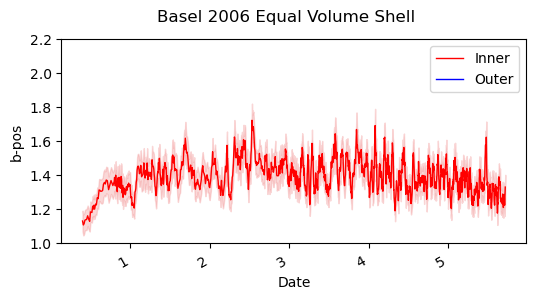

In [42]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("Basel 2006 Equal Volume Shell")
ax1.plot(dtr3[0],bpr3[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr3[0], np.subtract(bpr3[0],stdpr3[0]), np.add(bpr3[0],stdpr3[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr3[1],bpr3[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr3[1], np.subtract(bpr3[1],stdpr3[1]), np.add(bpr3[1],stdpr3[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([datetime(2006,12,3),datetime(2006,12,13)])
ax1.set_ylim([1,2.2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
ax1.legend(loc = 'upper right')
plt.show()

In [43]:
print(len(sDivs3[0]),len(sDivs3[1]))

159610 96


In [26]:
# Now 11 equal shells
# create 2d array to arrange shells of references based on distance
rDivs3=[[] for i in range(11)]
rDmaxRad3=[]
count=0
rpl=0
#10 shell
for i in range(len(hrC3)):
    if hrC3[i]<radDiv11[0]:
        rDivs3[0].append(hrRef3[i])
for j in range(1,11):
    for i in range(len(hrC3)):
        if hrC3[i]<radDiv11[j] and hrC3[i]>radDiv11[j-1]:
            rDivs3[j].append(hrRef3[i])

sDivs3=[[] for i in range(11)]
for i in range(11):
    sDivs3[i]=quicksort(rDivs3[i])

br3=[[] for i in range(11)]
bpr3=[[] for i in range(11)]
dtr3=[[] for i in range(11)]
lbr3=[[] for i in range(11)]
hbr3=[[] for i in range(11)]
stdr3=[[] for i in range(11)]
lbpr3=[[] for i in range(11)]
hbpr3=[[] for i in range(11)]
stdpr3=[[] for i in range(11)]
mxmr3=[[] for i in range(11)]
mxdr3=[[] for i in range(11)]

for i in range(11):
    print(i)
    t1 = True
    t2 = True
    t3 = True
    for x in range(1000,len(sDivs3[i]),100):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-1000,x):
            mxt.append(MNew[sDivs3[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs3[i][j]]
        mxT=np.array(mxt)
        mxmr3[i].append(mxm)
        mxdr3[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
        br3[i].append(b)
        dtr3[i].append(dtF[sDivs3[i][x]])
        bpr3[i].append(bP)
        lbr3[i].append(low_b)
        lbpr3[i].append(low_bp)
        hbr3[i].append(high_b)
        hbpr3[i].append(high_bp)
        stdr3[i].append(std)
        stdpr3[i].append(stdp)
        
        if(t1==True  and hDT[sDivs3[i][x]]>=datetime(2006,12,7)):
            mfDisp(mxT,hDT[sDivs3[i][x]],i)
            t1=False
            
        if(t2==True  and hDT[sDivs3[i][x]]>=datetime(2006,12,8)):
            mfDisp(mxT,hDT[sDivs3[i][x]],i)
            t2=False
            
        if(t3==True  and hDT[sDivs3[i][x]]>=datetime(2006,12,9,12)):
            mfDisp(mxT,hDT[sDivs3[i][x]],i)
            t3=False

0
1
2
3
4
5
6
7
8
9
10


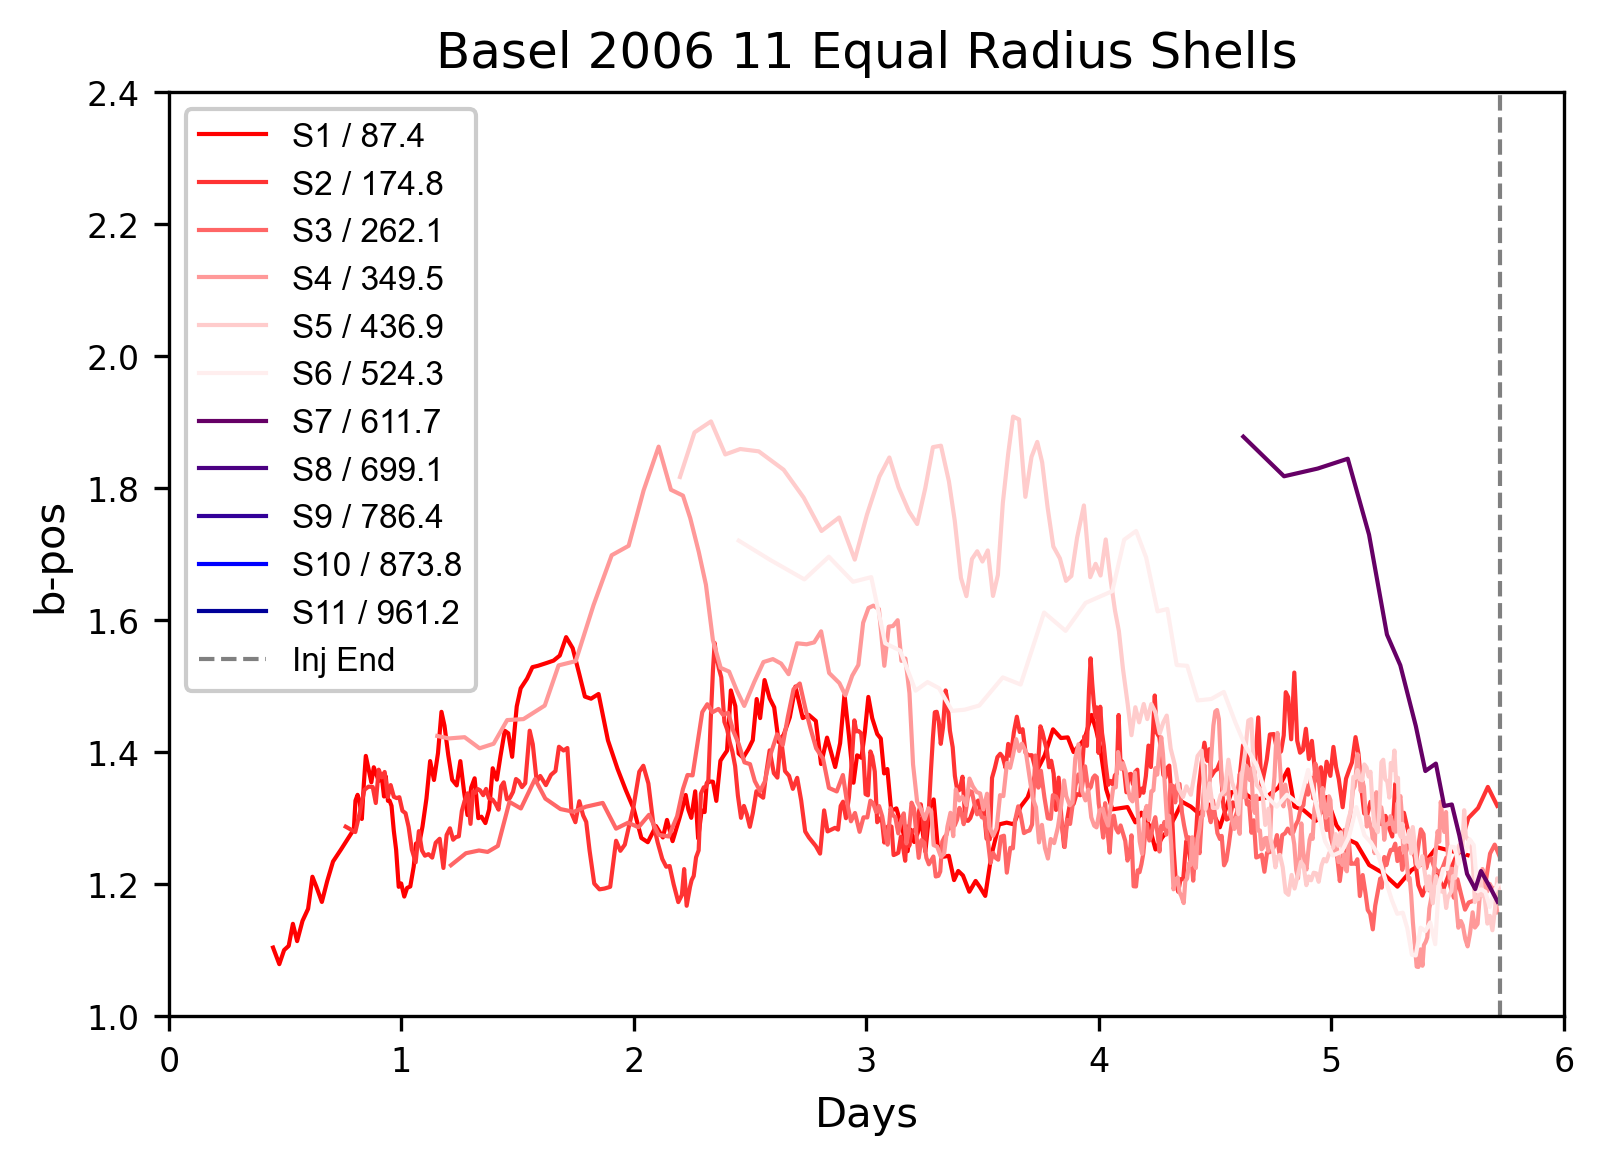

In [34]:
from datetime import timedelta
fig, ax = plt.subplots(figsize=(6,4),dpi=300)
plt.rcParams['font.family'] = 'Arial'

colors1 = [
    "#FF0000",  # Red
    "#FF3333",  # Red
    "#FF6666",  # Soft red
    "#FF9999",  # Lighter red
    "#FFCCCC",  # Lightest red
    "#FFEEEE",  # Very light red/pink
    "#660066",  # Purple
    "#4B0082",  # Indigo / purple-blue
    "#330099",  # Blue-purple
    "#0000FF",  # Blue
    "#000099",  # Deep blue
    "#000066"   # Very dark blue
]
colors2 = colors1


for i in range(11):
    ax.plot(dtr3[i],bpr3[i],linewidth=1,label="S"+str(i+1)+" / "+f"{float(radDiv11[i]):.1f}",color=colors2[i])
    #if i%2==0:
        #ax.text(dtr[i][0] - np.timedelta64(timedelta(hours=4)), bpos[i][0]+0.01, "S"+str(i+1), color='k',fontsize=13)



#ax.axvline((datetime(2006, 12, 8, 16, 48, 39)-stDat).total_seconds()/86400.0,color='black',linestyle='--',linewidth=1,label='Sequence Max')
ax.axvline(injEnd,color='gray',linestyle='--',linewidth=1,label='Inj End')
ax.set_ylim([1,2.4])
ax.set_xlim(0,6)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.set_ylabel(r'b-pos', fontsize =10)
ax.set_xlabel('Days',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8,framealpha=1)
plt.title("Basel 2006 11 Equal Radius Shells")
plt.show()

#fig.savefig(r"D:\Yihe\Manuscripting\basel shell fig.png",bbox_inches='tight', pad_inches=0.05)
#fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel shell fig.png",bbox_inches='tight', pad_inches=0.05)

In [83]:
print(len(sDivs3[9]))

78
